In [2]:
import nltk

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('data/sms.tsv',sep='\t',names=['label','message'])

In [5]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [8]:
df['length']=df.message.apply(len)

In [9]:
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [10]:
import matplotlib.pyplot as plt

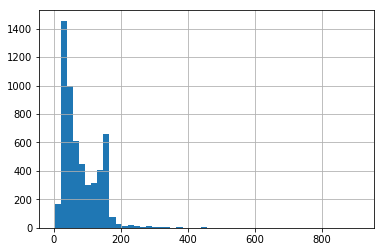

In [11]:
df.length.hist(bins=50)

In [12]:
df.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [13]:
df[df.length==910]

,label,message,length
1085,ham,For me the love should start with attraction.i...,910


In [14]:
df[df.length==910].iloc[0,1]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000015FBA7D400>,
      dtype=object)

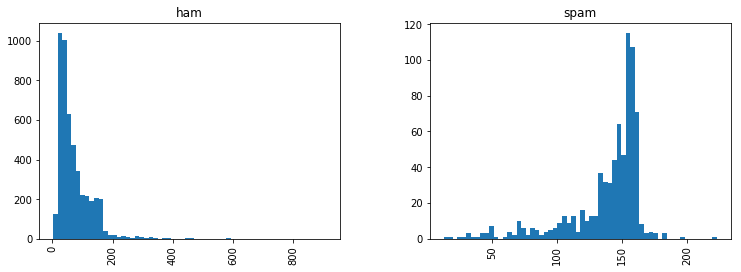

In [17]:
df.hist(column='length',by='label',figsize=(12,4),bins=60)

In [18]:
import string 

In [19]:
s='hello john ! how are you... i am fine.....:'

In [20]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
no_punc=[i for i in s if i not in string.punctuation]

In [22]:
no_punc=''.join(no_punc)

In [23]:
no_punc

'hello john  how are you i am fine'

In [24]:
from nltk.corpus import stopwordswords

In [25]:
stop_words=stopwords.words('english')

In [26]:
re_words=[w for w in no_punc.split() if w.lower() not in stop_words]

In [27]:
re_words

['hello', 'john', 'fine']

In [28]:
def clean_text(msg):
    m=[w for w in msg if w not in string.punctuation]
    m=''.join(m)
    
    re_words=[w for w in no_punc.split() if w.lower() not in stop_words]
    
    return " ".join(re_words)

In [30]:
clean_text('hello,i am jdm(3i)')

'hello john fine'

In [31]:
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [32]:
df.message=df.message.apply(clean_text)

In [33]:
df.head()

,label,message,length
0,ham,hello john fine,111
1,ham,hello john fine,29
2,spam,hello john fine,155
3,ham,hello john fine,49
4,ham,hello john fine,61


In [34]:
df['length']=df.message.apply(len)

In [35]:
df.head()

,label,message,length
0,ham,hello john fine,15
1,ham,hello john fine,15
2,spam,hello john fine,15
3,ham,hello john fine,15
4,ham,hello john fine,15


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000015FD634470>,
      dtype=object)

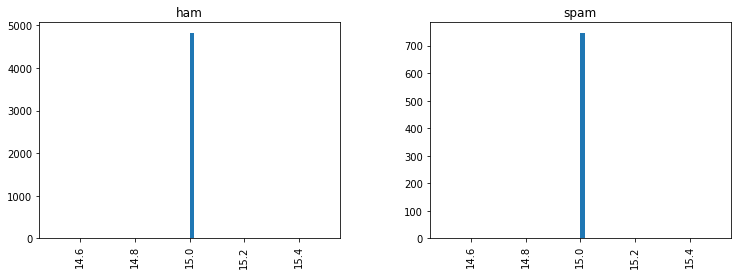

In [36]:
df.hist(column='length',by='label',figsize=(12,4),bins=60)

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
bag_of_words=CountVectorizer()
bag_of_words.fit(df['message'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [40]:
len(bag_of_words.vacabulary_)

AttributeError: 'CountVectorizer' object has no attribute 'vacabulary_'

In [41]:
test=df.message[3]

In [42]:
test

'hello john fine'

In [43]:
new_msg=bag_of_words.transform([test])

In [45]:
print(new_msg)

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1


In [ ]:
bag-of_words.get_ferature_names()

In [ ]:
new_msg=bag_of-eords.transform(text)